# Lab 02 - Bài tập

## MATPLOTLIB



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Bài 1

Cho dữ liệu 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

1. Đọc dữ liệu và gán vào cho biến chipo. hiển thi 10 dòng đầu của dữ liệu
2. Tạo biến x chứa các item_name, in head của x. Sử dụng collections.Counter(x) để tạo một dictionary với key là item_name và value là tần suất xuất hiện của item_name, gán cho biến letter_counts. In letter_counts
3. Chuyển letter_counts thành DataFrame và đặt tên là df
4. Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên. Vẽ biểu đồ khối với 5 item này có title xlabel, ylabel và xsticks
5. Cập nhật lại cột item_price với đơn giá là số thực. Nhóm các đơn hàng theo order_id. Tính tổng giá trị của mỗi đơn hàng => gán vào biến orders. In head của orders
6. Vẽ scatterplot của orders với x là orders.item_price và y là orders.quantityc có title xlabel, ylabel

In [2]:
#1.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(url)
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
#1.2
x = chipo['item_name']
from collections import Counter
letter_counts = Counter(x)
print(letter_counts)

Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar': 27, 'Barbacoa Soft Tacos': 25, 'Chips and Roasted Chili Corn Salsa': 22, 'Izze': 20, 'Chips and Tomatillo-Red Chili Salsa': 20, 'Veggie Salad Bowl': 18, 'Chips and Roasted Chili-Corn Salsa': 18, 'Barbacoa Crispy Tacos': 11, 'Barbacoa Salad Bowl

In [4]:
#1.3
df = pd.DataFrame.from_dict(letter_counts, orient='index').reset_index()
df.head(5)

,index,0
0,Chips and Fresh Tomato Salsa,110
1,Izze,20
2,Nantucket Nectar,27
3,Chips and Tomatillo-Green Chili Salsa,31
4,Chicken Bowl,726


In [5]:
df_top5 = df.sort_values(0, ascending=False).head(5)

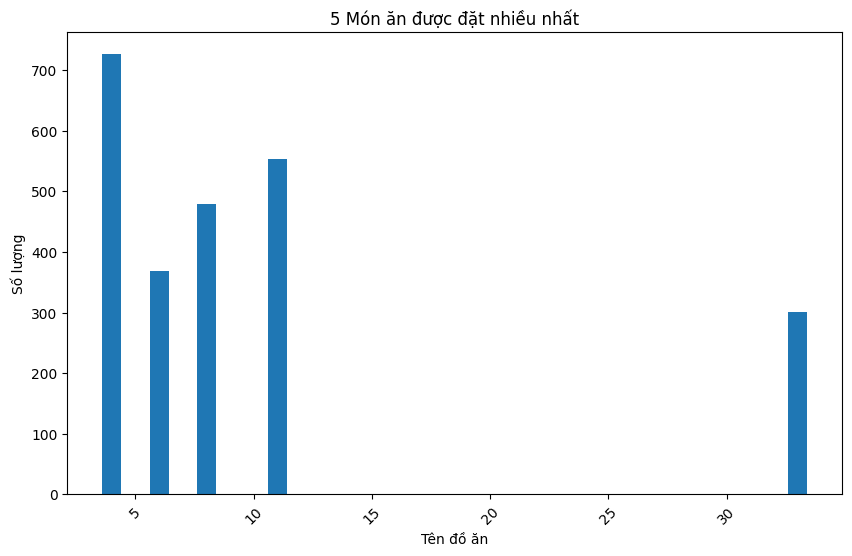

In [6]:

plt.figure(figsize=(10,6))
# sns.barplot(x='index', y=0, data=df_top5)
plt.bar(df_top5.index, df_top5[0])
plt.title('5 Món ăn được đặt nhiều nhất')
plt.xlabel('Tên đồ ăn')
plt.ylabel('Số lượng')

plt.xticks(rotation=45)

plt.show()

In [7]:
#1.5
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
# grouped_orders = chipo.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'})
grouped_orders = chipo.groupby('order_id')
order = grouped_orders[['item_price', 'quantity']].sum()
order.head()


,item_price,quantity
order_id,,
1,11.56,4
2,16.98,2
3,12.67,2
4,21.00,2
5,13.70,2


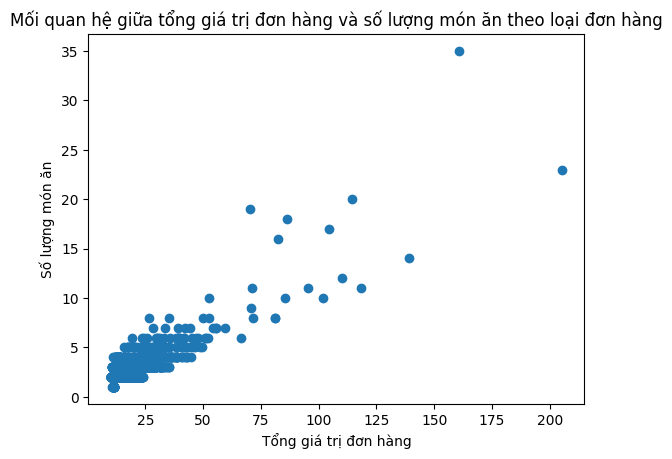

In [8]:
#1.6
plt.scatter(order['item_price'], order['quantity'])

plt.title('Mối quan hệ giữa tổng giá trị đơn hàng và số lượng món ăn theo loại đơn hàng')
plt.title('Mối quan hệ giữa tổng giá trị đơn hàng và số lượng món ăn theo loại đơn hàng')
plt.xlabel('Tổng giá trị đơn hàng')
plt.ylabel('Số lượng món ăn')
plt.show()

### Bài 2

Cho dữ liệu thô như sau: 

```python
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}
```            
2.1. Tạo DataFrame df từ dữ liệu trên. In df.

2.2. Câu 2: Tạo một Scatterplot của preTestScore và postTestScore, với kích thước s của mỗi điểm được xác định theo age. Thiết lập xlabel, ylabel và title.

2.3. Tạo một Scatterplot của preTestScore và postTestScore. Lần này kích thước s sẽ gấp 4.5 lần postTestScore. Màu c được xác định theo giới tính (df.female). Thiết lập xlabel, ylabel và title.

In [9]:
#2.1
rawdata = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}
df2 = pd.DataFrame(rawdata)
df2.head()

,first_name,last_name,female,age,preTestScore,postTestScore
0,Jason,Miller,0,42,4,25
1,Molly,Jacobson,1,52,24,94
2,Tina,Ali,1,36,31,57
3,Jake,Milner,0,24,2,62
4,Amy,Cooze,1,73,3,70


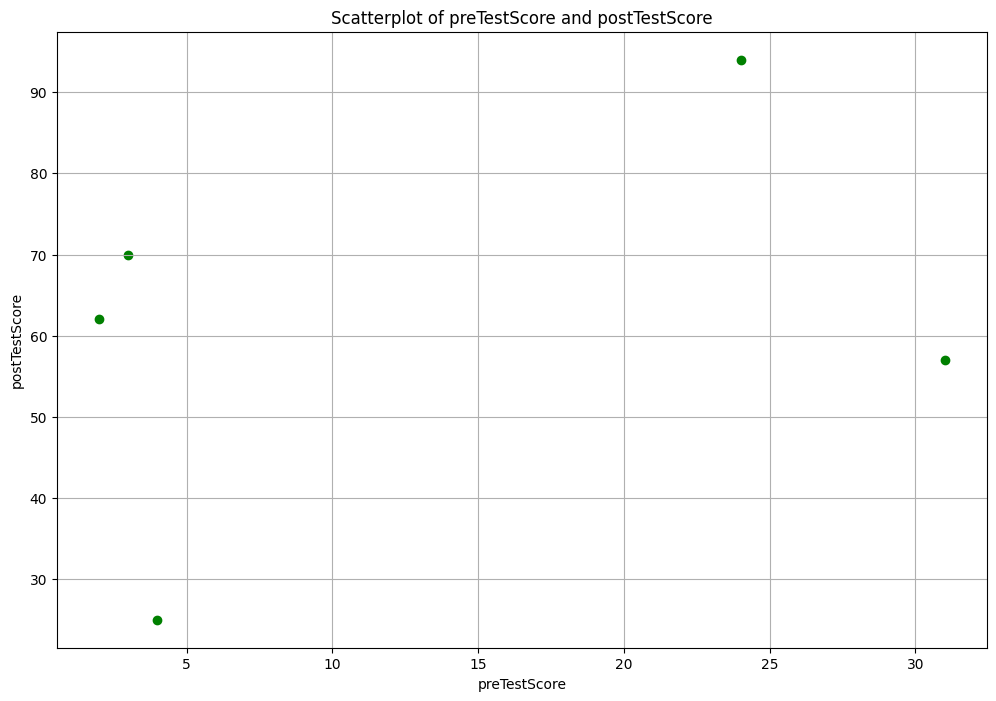

In [10]:
#2.2
import seaborn as sns
plt.figure(figsize = (12,8))
plt.scatter(df2['preTestScore'],df2['postTestScore'],c = 'green',marker = 'o')
plt.xlabel("preTestScore")
plt.ylabel("postTestScore")
plt.grid(True)
plt.title("Scatterplot of preTestScore and postTestScore")
plt.show()


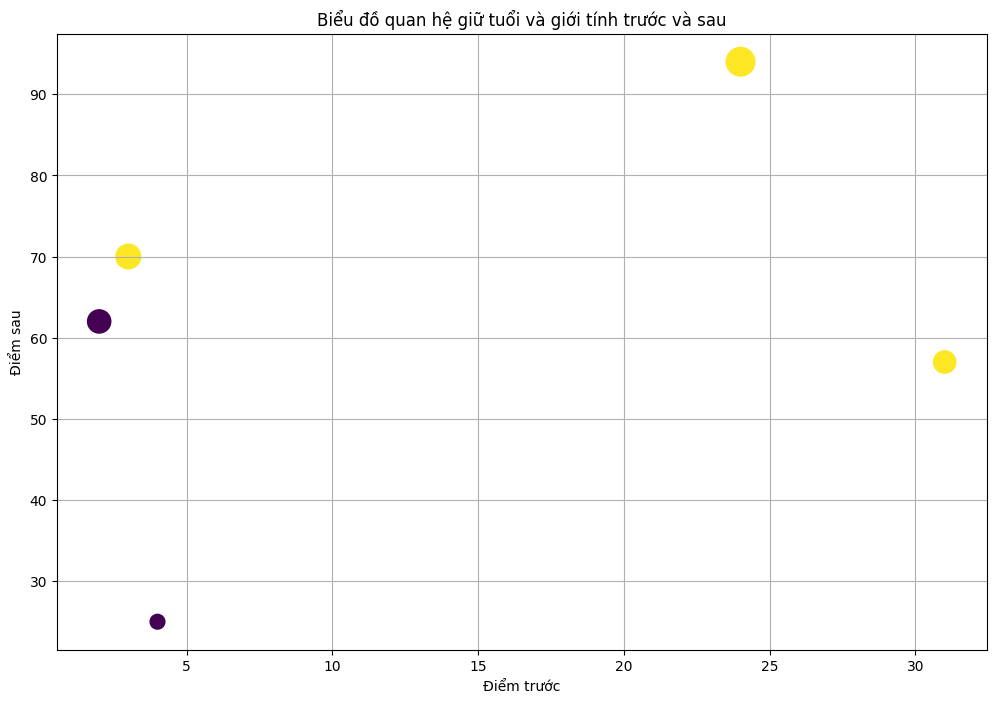

In [11]:
#2.3
plt.figure(figsize = (12,8))
plt.scatter(df2['preTestScore'],df2['postTestScore'],marker = 'o',s =df2['postTestScore']*4.5 ,c = df2['female'],cmap = 'viridis')
plt.xlabel("Điểm trước")
plt.ylabel("Điểm sau")
plt.title("Biểu đồ quan hệ giữ tuổi và giới tính trước và sau")
plt.grid(True)
plt.show()

### Bài 3

Cho dữ liệu year, pop, gdp_cap, life_exp từ tập tin `du_lieu_year_gap_pop_life.txt`, col từ tập tin `col.txt`

**Hãy thực hiện các yêu cầu sau:**

1. Tạo year, pop. In item cuối của year và pop
2. Vẽ biểu đồ line của year và pop với x-axis: year, y-axis: pop
3. Tạo gdp_cap, life_exp. In item cuối của gdp_cap, life_exp
4. Vẽ biểu đồ line của gdp_cap, life_exp với x-axis: gdp_cap, y-axis: life_exp. Biểu đồ này có thể xem được không? Nếu không thì đề xuất một loại biểu đồ phù hợp 
5. Vẽ histogram của life_exp, màu cột xanh, viền đỏ
6. Vẽ histogram với bins = 5, màu cột xanh dương, viền đỏ
7. Vẽ histogram với bins = 20, màu cột xanh dương, viền đỏ
8. Từ life_exp1950 trong tập tin => Tạo life_exp1950. Vẽ histogram life_exp1950, với bins = 15, màu cột xanh dương, viền đỏ
9. Tạo scatter plot của gdp_gap và life_exp, sử dụng plt.xscale('log'). Thiết lập xlabel, ylabel, title
10. Tạo Scatter plot của gdp_gap và life_exp, sử dụng plt.xscale('log'). Thiết lập xlabel, ylabel, title. plt.scatter(gdp_cap, life_exp). Với: tick_val = [1000,10000,100000] và tick_lab = ['1k','10k','100k'] => plt.xticks(tick_val, tick_lab)
11. Đưa pop vào array np_pop. Vẽ scatter plot của gdp_cap, life_exp, với s = np_pop * 2, màu magenta. Thiết lập xlabel, ylabel, title và plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
12. Tạo col từ col trong tập tin col.txt. Vẽ scatter plot của gdp_cap, life_exp, với s = np.array(pop) * 2, màu c = col, alpha=0.8. Thiết lập xlabel, ylabel, title và plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
13. Tạo col từ col trong tập tin col.txt. Vẽ scatter plot của gdp_cap, life_exp, với s = np.array(pop) * 2, màu c = col, alpha=0.8. Thiết lập xlabel, ylabel, title và plt.xticks([1000, 10000, 100000],['1k', '10k', '100k']). Thêm text cho 2 nơi trên biểu đồ là India và China: plt.text(1550, 71, 'India'), plt.text(5700, 80, 'China'). Thêm lưới cho biểu đồ

In [12]:
with open('dulieu_year_gap_pop_life.txt', 'r') as f:
    data = f.read()

exec(data)

with open('col.txt', 'r') as f:
    col_data = f.read()

exec(col_data)

print(f"Last year: {year[-1]}")
print(f"Last pop: {pop[-1]}")

FileNotFoundError: [Errno 2] No such file or directory: 'dulieu_year_gap_pop_life.txt'

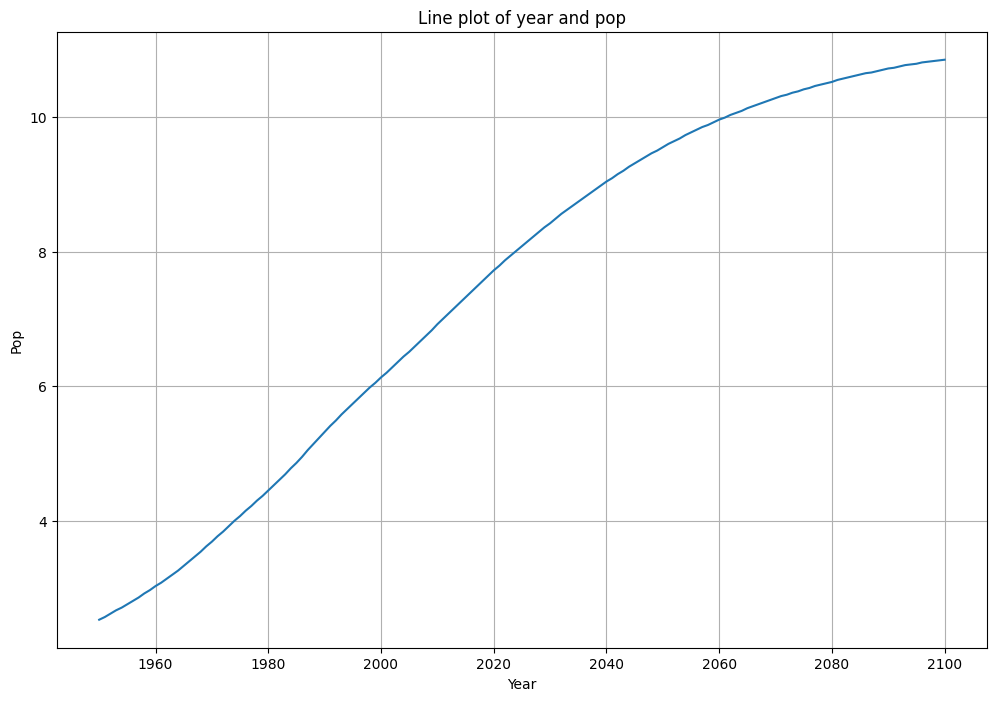

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(year,pop)
plt.xlabel("Year")
plt.ylabel("Pop")
plt.title("Line plot of year and pop")
plt.grid(True)
plt.show()

In [ ]:
#3.3
print(f"Last gdp_cap: {gdp_cap[-1]}")
print(f"Last life_exp: {life_exp[-1]}")

Last gdp_cap: 469.70929810000007
Last life_exp: 43.487


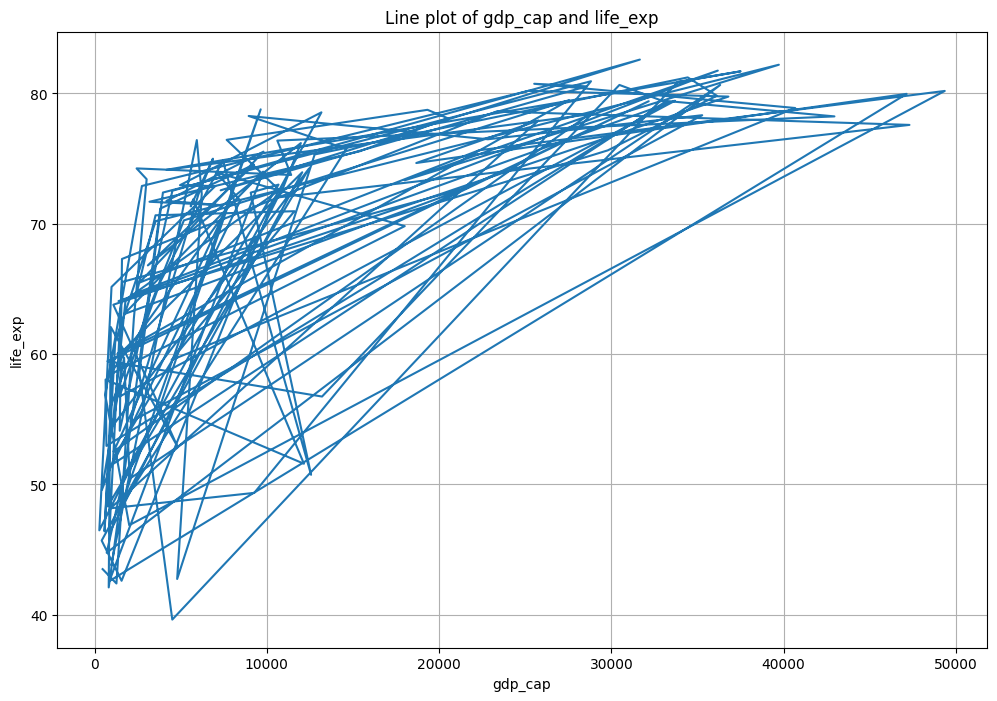

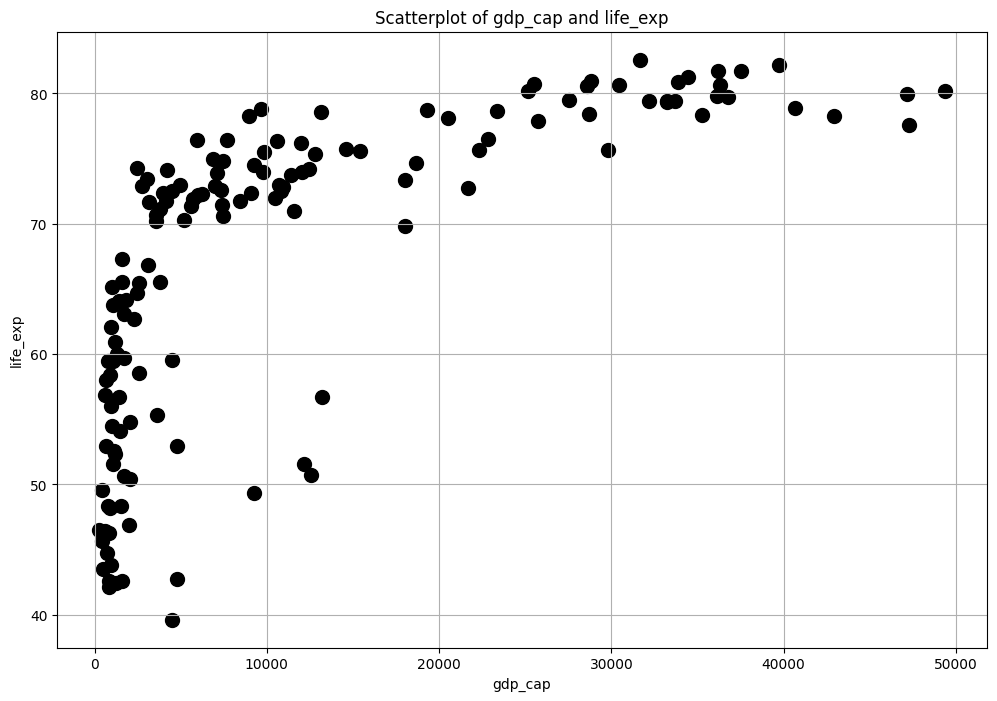

In [ ]:
#Biểu đồ này không phù hợp cho mối quan hệ của 2 giá trị trên.Biểu đồ scatter sẽ phù hợp hơn
#Biểu đồ scatter sẽ phù hợp hơn
plt.figure(figsize = (12,8))
plt.plot(gdp_cap,life_exp)
plt.xlabel("gdp_cap")
plt.ylabel("life_exp")
plt.title("Line plot of gdp_cap and life_exp")
plt.grid(True)
plt.show()
plt.figure(figsize = (12,8))
plt.scatter(gdp_cap,life_exp,marker = 'o',s = 100, color = 'black')
plt.xlabel("gdp_cap")
plt.ylabel("life_exp")
plt.title("Scatterplot of gdp_cap and life_exp")
plt.grid(True)
plt.show()

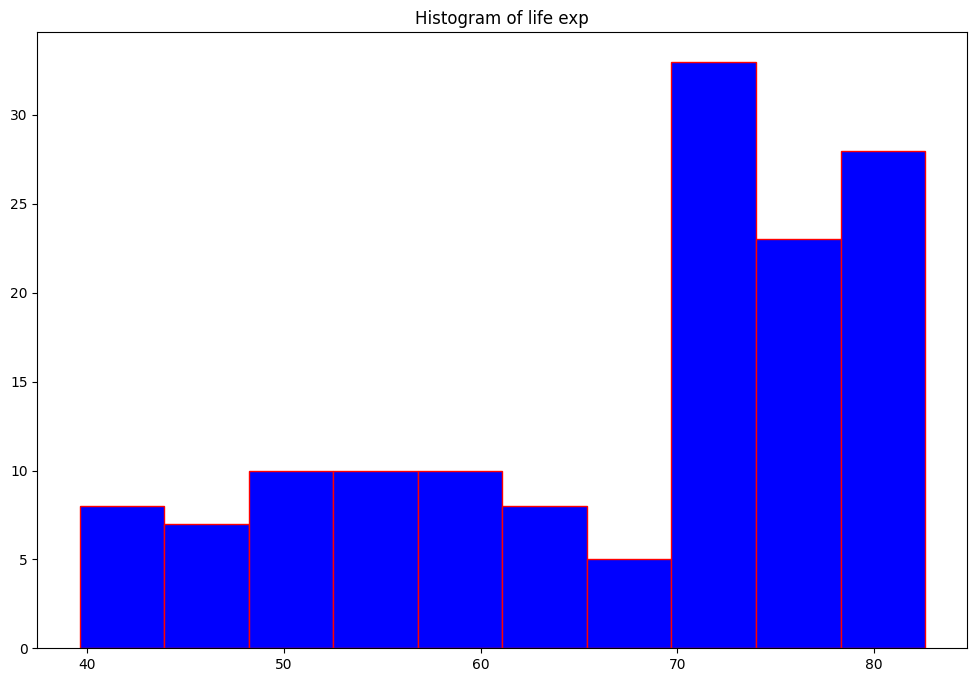

In [ ]:
#3.5
plt.figure(figsize = (12,8))
plt.hist(life_exp,color = 'blue',edgecolor = 'red')
plt.title('Histogram of life exp')

plt.show()

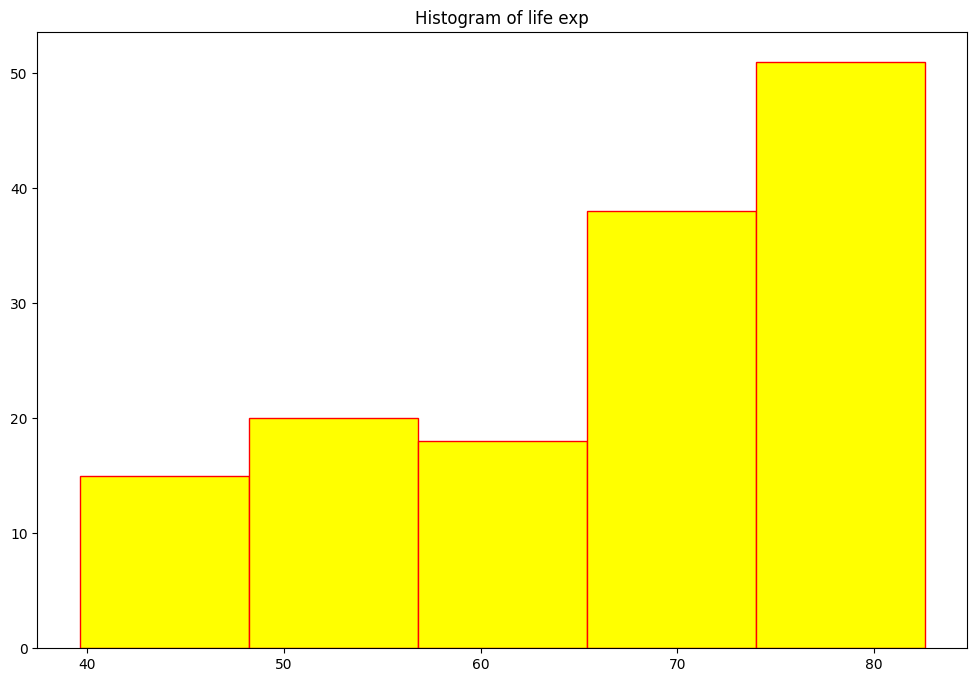

In [ ]:
#3.6
plt.figure(figsize = (12,8))
plt.hist(life_exp,bins = 5,color = 'yellow',edgecolor = 'red')

plt.title('Histogram of life exp')
plt.show()

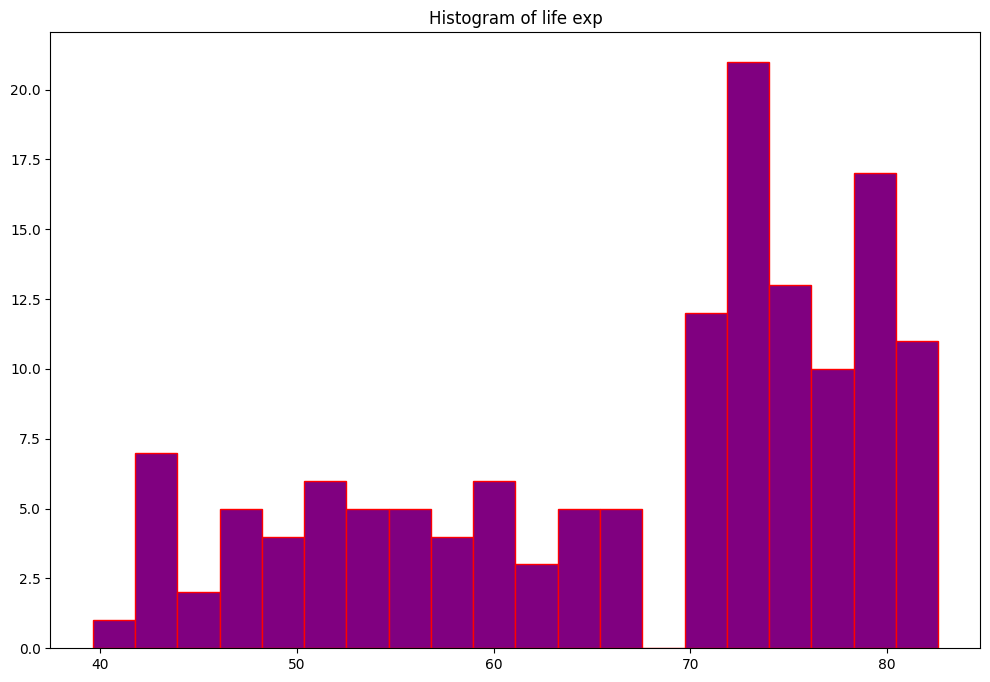

In [ ]:
#3.7
plt.figure(figsize = (12,8))
plt.hist(life_exp,bins = 20,color = 'purple',edgecolor = 'red')

plt.title('Histogram of life exp')
plt.show()

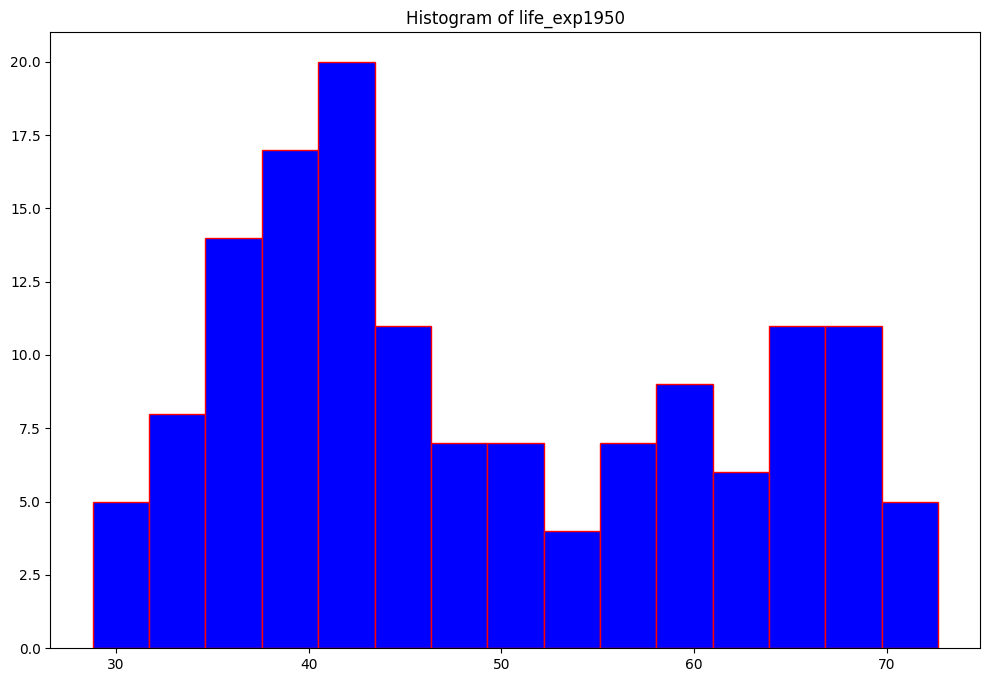

In [ ]:
#3.8

plt.figure(figsize = (12,8))
plt.hist(life_exp1950,bins = 15,color = 'blue',edgecolor = 'red')
plt.title('Histogram of life_exp1950')
plt.show()

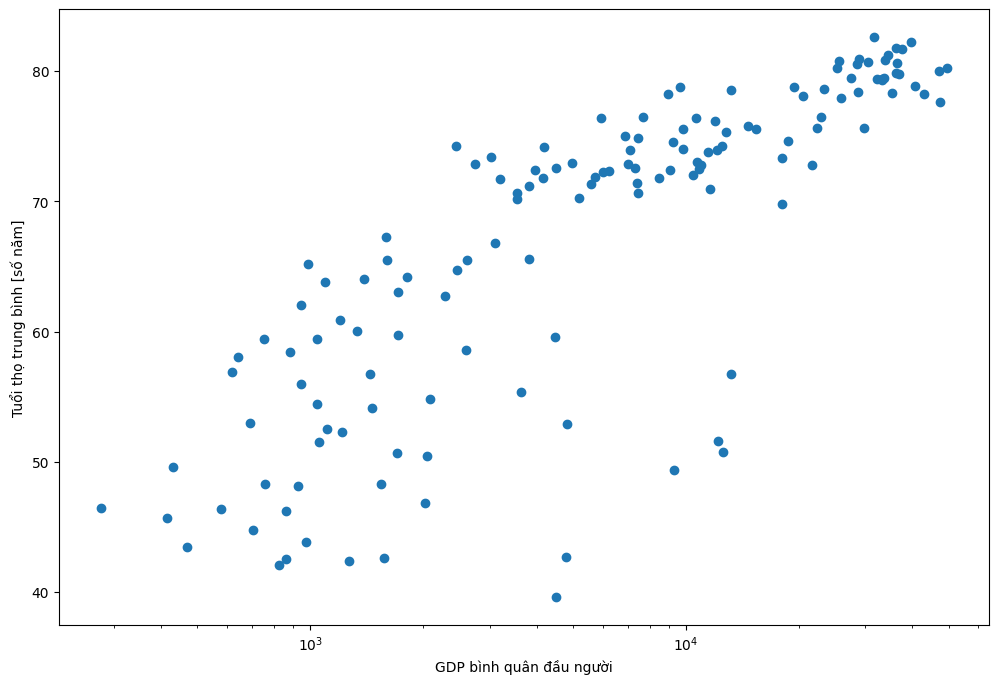

In [ ]:
#3.9

plt.figure(figsize = (12,8))
plt.scatter(gdp_cap,life_exp)
plt.xscale('log') 
plt.xlabel('GDP bình quân đầu người')
plt.ylabel('Tuổi thọ trung bình [số năm]')
plt.show()

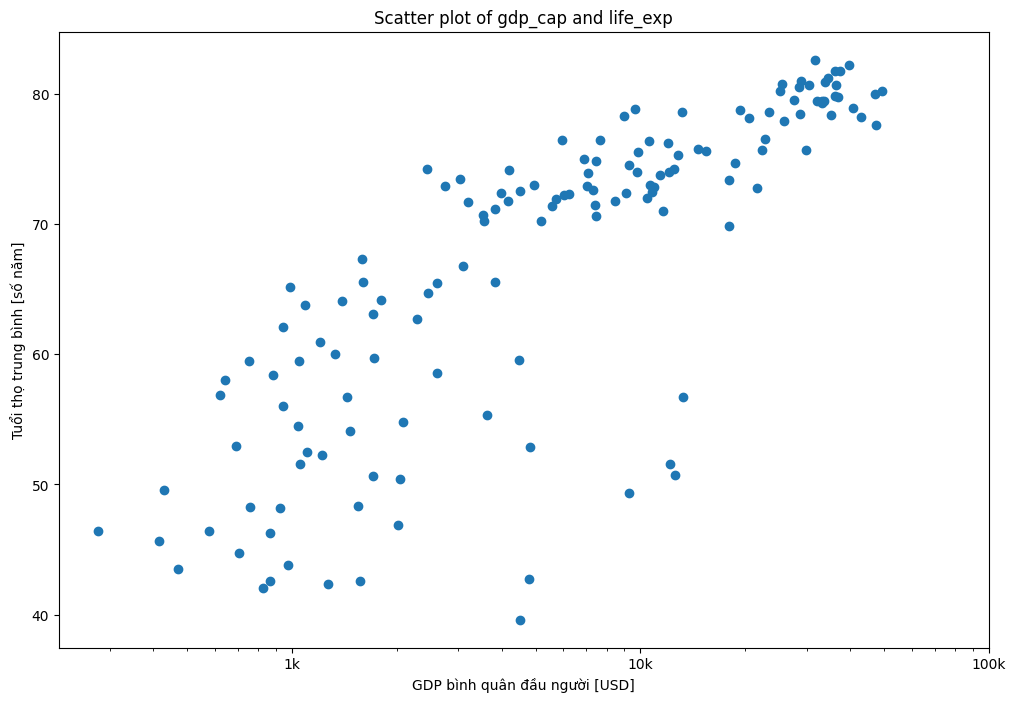

In [ ]:
#3.10
plt.figure(figsize = (12,8))
plt.scatter(gdp_cap,life_exp)
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xscale('log') 
plt.xlabel('GDP bình quân đầu người [USD]')
plt.ylabel('Tuổi thọ trung bình [số năm]')
plt.title('Scatter plot of gdp_cap and life_exp')
plt.xticks(tick_val,tick_lab)
plt.show()

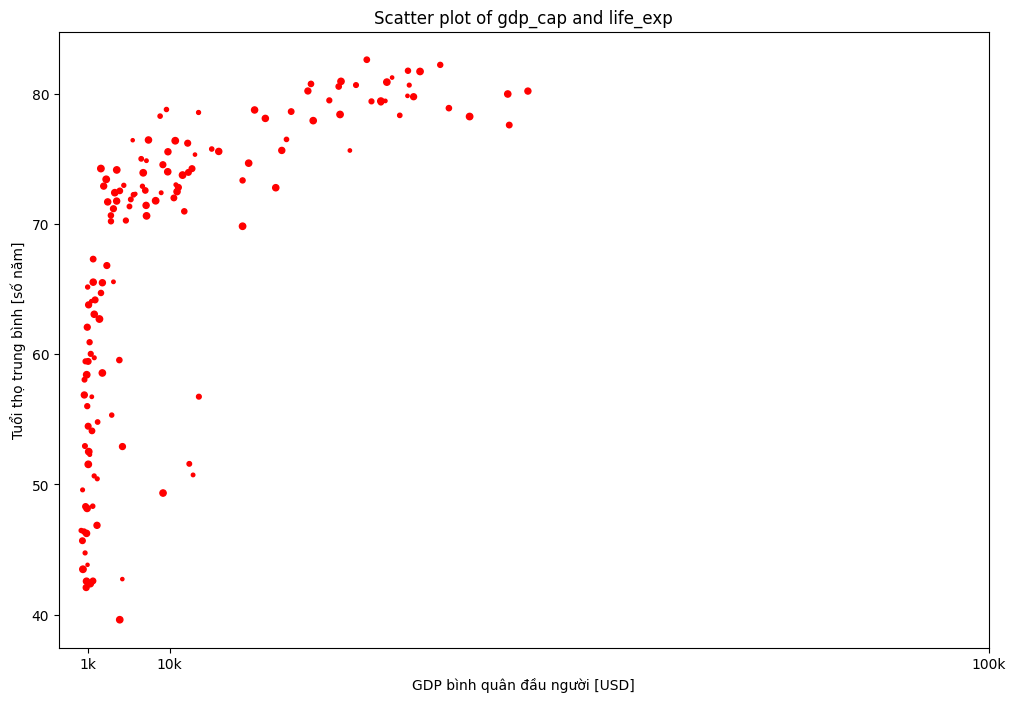

In [ ]:
#3.11
import numpy as np
np_pop = np.array(pop)
plt.figure(figsize = (12,8))
plt.scatter(gdp_cap, life_exp, s= np_pop[0:142]*2, color='red')
plt.xlabel('GDP bình quân đầu người [USD]')
plt.ylabel('Tuổi thọ trung bình [số năm]')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.title('Scatter plot of gdp_cap and life_exp')
plt.xticks(tick_val,tick_lab)
plt.show()

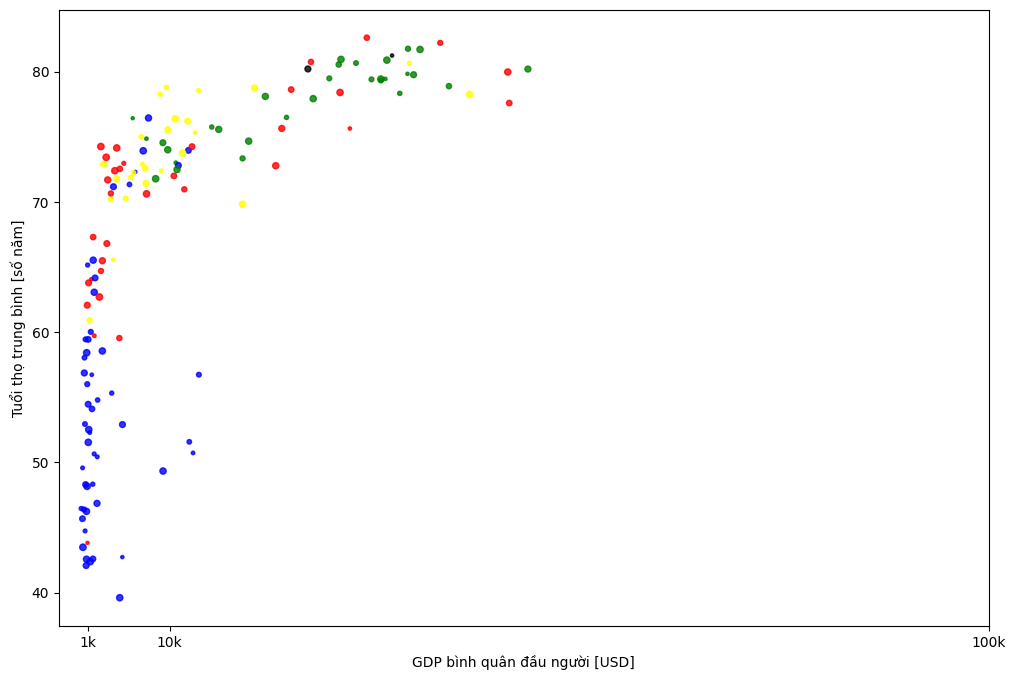

In [ ]:
#3.12
np_pop = np.array(pop)
plt.figure(figsize = (12,8))
plt.scatter(gdp_cap, life_exp, s= np_pop[0:142]*2, c = col, alpha = 0.8)
plt.xlabel('GDP bình quân đầu người [USD]')
plt.ylabel('Tuổi thọ trung bình [số năm]')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.xticks(tick_val,tick_lab)

plt.show()

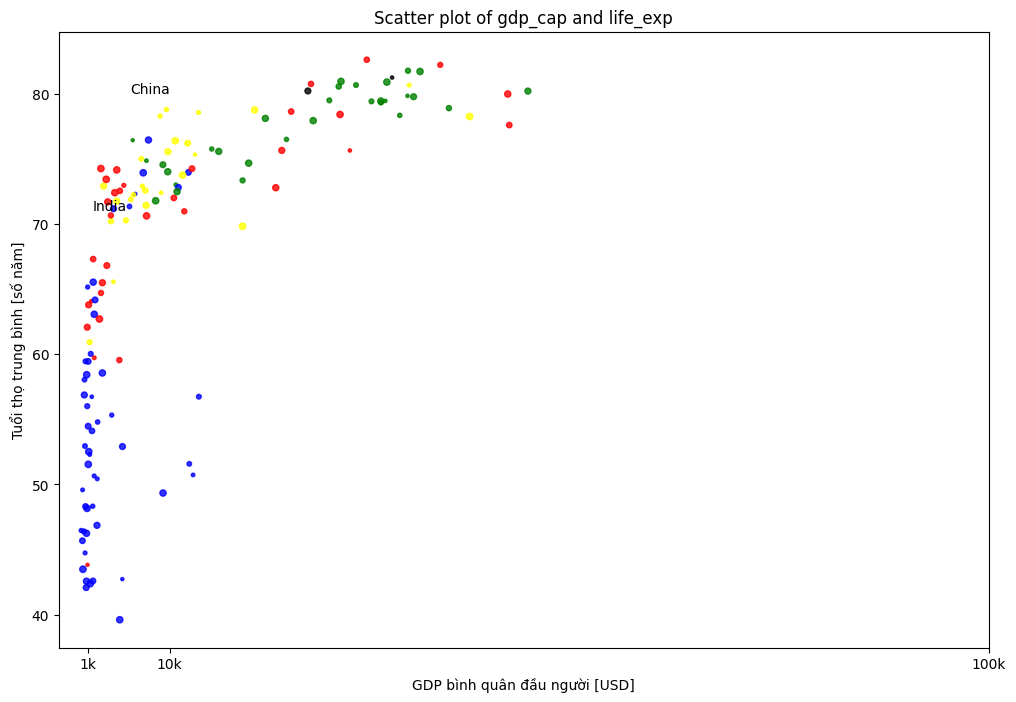

In [ ]:
#3.13
np_pop = np.array(pop)
plt.figure(figsize = (12,8))
plt.scatter(gdp_cap, life_exp, s= np_pop[0:142]*2, c = col, alpha = 0.8)
plt.xlabel('GDP bình quân đầu người [USD]')
plt.ylabel('Tuổi thọ trung bình [số năm]')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.title('Scatter plot of gdp_cap and life_exp')
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

plt.xticks(tick_val,tick_lab)
plt.show()

## SEABORN



### Bài 4

4.1. Hãy vẽ barplot cho dữ liệu sau:

```python
    x =  ["Excellent","Very Good","Good","Midium"]
    y = [5.0,15.0,20.0,5.0]
```
4.2. Cho dữ liệu:
```python
chars = "A A A A A A A A A A B B B B B B C C C C C C D D D D D D D D D D E E E E E E E F F F F G G G G G G G H H H H"
````
Hãy vẽ **barplot** với mỗi cột có tên là ký tự, giá trị là số lần xuất hiện của ký tự đó trong chuỗ

4.3. Biểu diễn dữ liệu `chars` ở trên bằng swarmplot

C:\Users\tontide1\AppData\Local\Temp\ipykernel_8572\4010519830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=x,y=y,palette='muted')


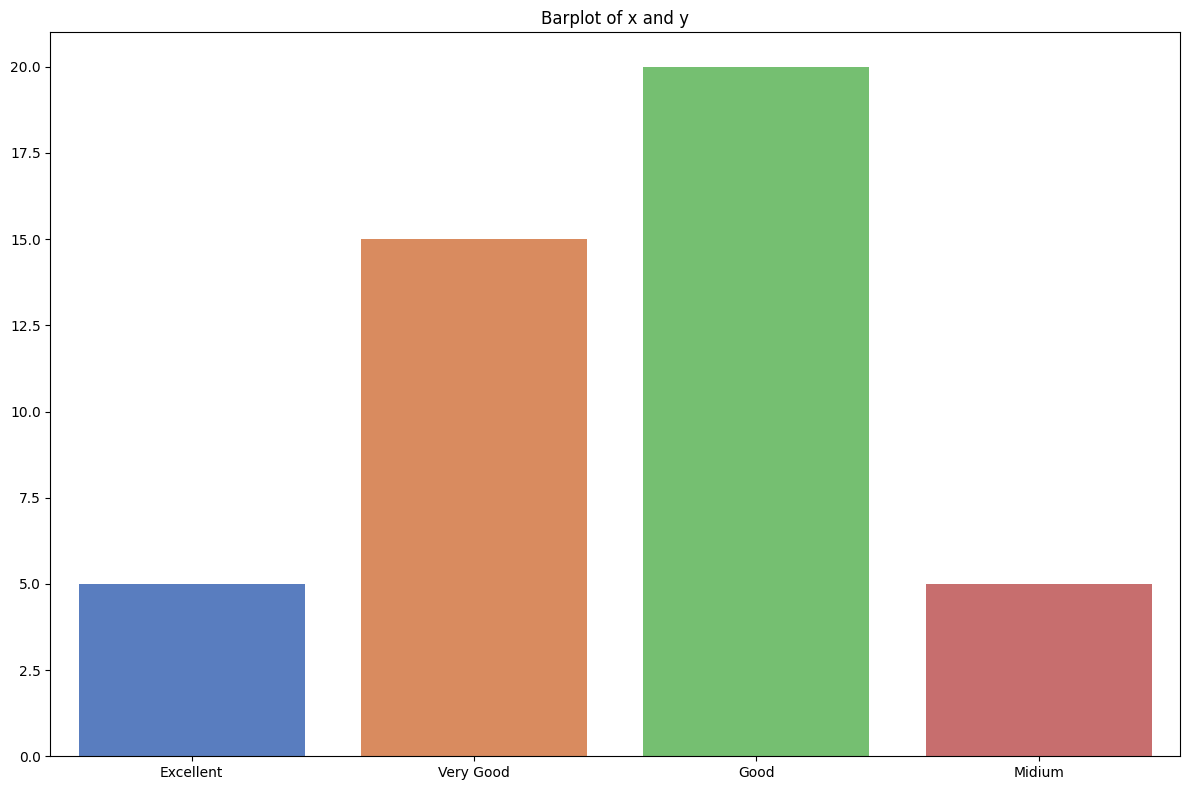

In [ ]:
#4.1
import seaborn as sn
x =  ["Excellent","Very Good","Good","Midium"]
y = [5.0,15.0,20.0,5.0]
plt.figure(figsize = (12,8))
sn.barplot(x=x,y=y,palette='muted')
plt.title("Barplot of x and y")
plt.tight_layout()
plt.show()

C:\Users\tontide1\AppData\Local\Temp\ipykernel_8572\3781852776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=char['Char'],y=char['Frenquency'],palette='muted')


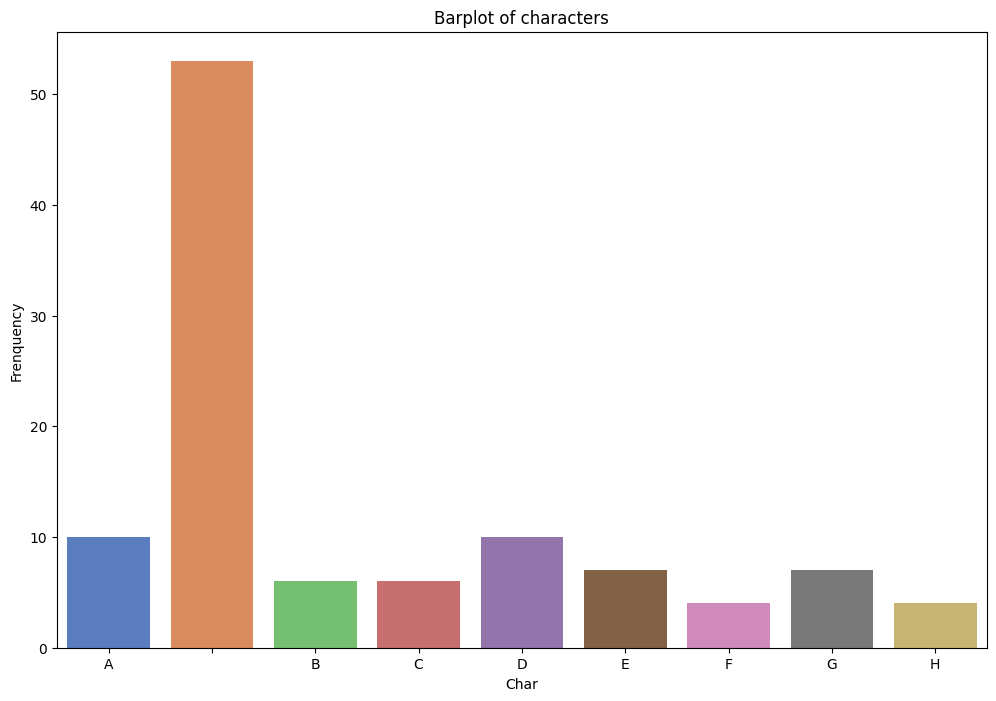

In [ ]:
#4.2
from collections import Counter
chars = "A A A A A A A A A A B B B B B B C C C C C C D D D D D D D D D D E E E E E E E F F F F G G G G G G G H H H H"
count = Counter(chars)
char = pd.DataFrame(count.items(),columns = ('Char','Frenquency'))
plt.figure(figsize = (12,8))
sn.barplot(x=char['Char'],y=char['Frenquency'],palette='muted')
plt.title("Barplot of characters")
plt.show()

C:\Users\tontide1\AppData\Local\Temp\ipykernel_8572\428079606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.swarmplot(x=char['Char'],y=char['Frenquency'],palette='muted')


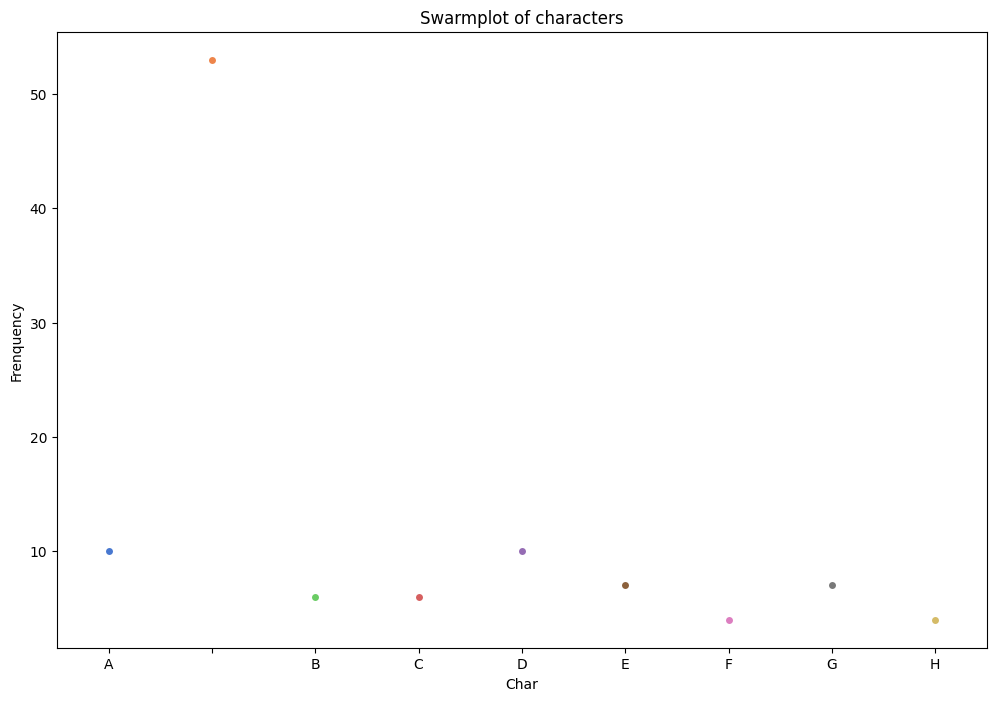

In [ ]:
#4.3
plt.figure(figsize = (12,8))
sn.swarmplot(x=char['Char'],y=char['Frenquency'],palette='muted')
plt.title("Swarmplot of characters")
plt.show()

### Bài 5

Cho dữ liệu `Pokemon.csv` => đọc dữ liệu: 

5.1. Vẽ scatterplot: Phân loại với các điểm không chồng chéo, so sánh Attack (trục x) & Defense (trục y)

5.2. Vẽ scatterplot: So sánh Attack (trục x) & Defense (trục y), có sử dụng thêm regression line với lmplot()

5.3. Vẽ regression plot: thể hiện mối quan hệ tuyến tính giữa Attack (trục x) & Speed(trục y)

5.4. Vẽ boxplot cho toàn bộ dữ liệu

5.5. Vẽ boxplot không có các cột 'Total', 'Generation', 'Legendary'

5.6. Vẽ histogram: biểu diễn tần suất của cột Attack 

5.7. Vẽ barplot: Nhóm dữ liệu theo Type 1, cho biết mỗi type có mấy mẫu, sắp tăng dần

5.8. Vẽ pairplot: thể hiện mối quan hệ giữa "Attack", "Defense" theo từng 'Type 1'

5.9. Vẽ JointGrid: gồm sb.regplot, sb.distplot để thể hiện mối quan hệ giữa "Attack", "Defense"

5.10. Vẽ JointPlot: thể hiện mối quan hệ giữa 'HP' và 'Speed' dạng hex

In [ ]:
df5 = pd.read_csv('Pokemon.csv')
df5.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


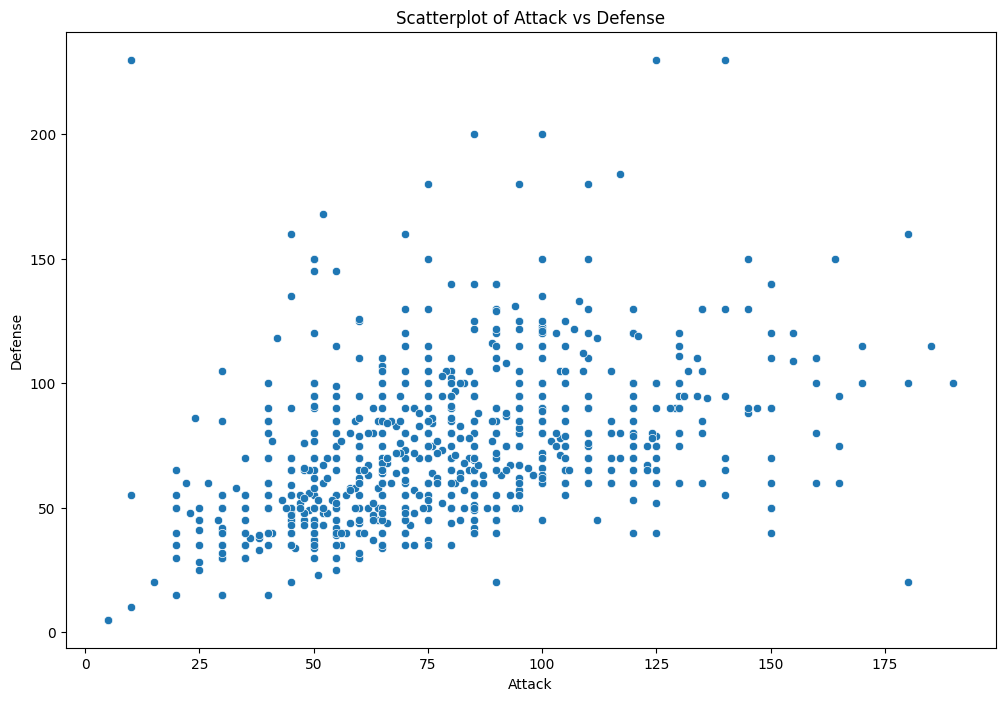

In [ ]:
#5.1
plt.figure(figsize=(12,8))
sn.scatterplot(x='Attack', y='Defense', data=df5)
plt.title('Scatterplot of Attack vs Defense')
plt.show()

<Figure size 1200x800 with 0 Axes>

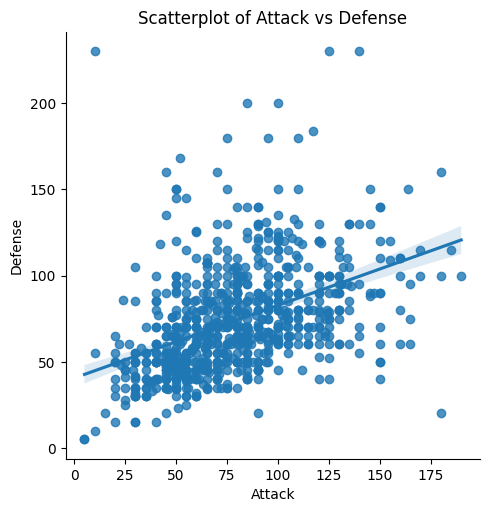

In [ ]:
#5.2
plt.figure(figsize = (12,8))
sn.lmplot(x='Attack',y='Defense',data=df5)
plt.title('Scatterplot of Attack vs Defense')
plt.show()

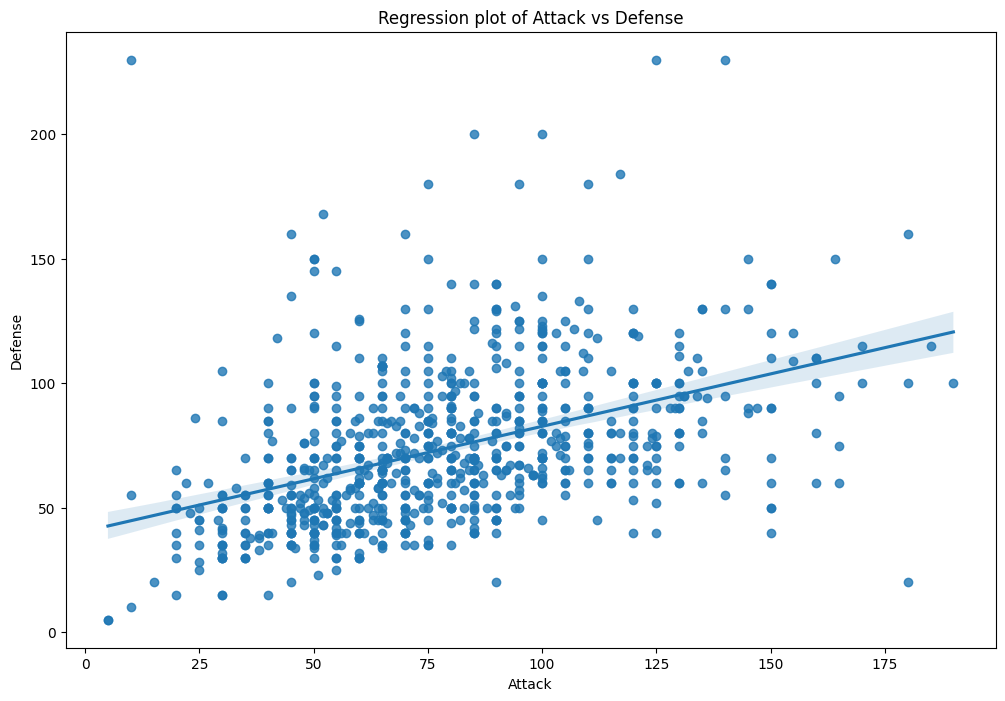

In [ ]:
#5.3
plt.figure(figsize=(12,8))
sn.regplot(x = 'Attack',y = 'Defense',data=df5)
plt.title('Regression plot of Attack vs Defense')
plt.show()

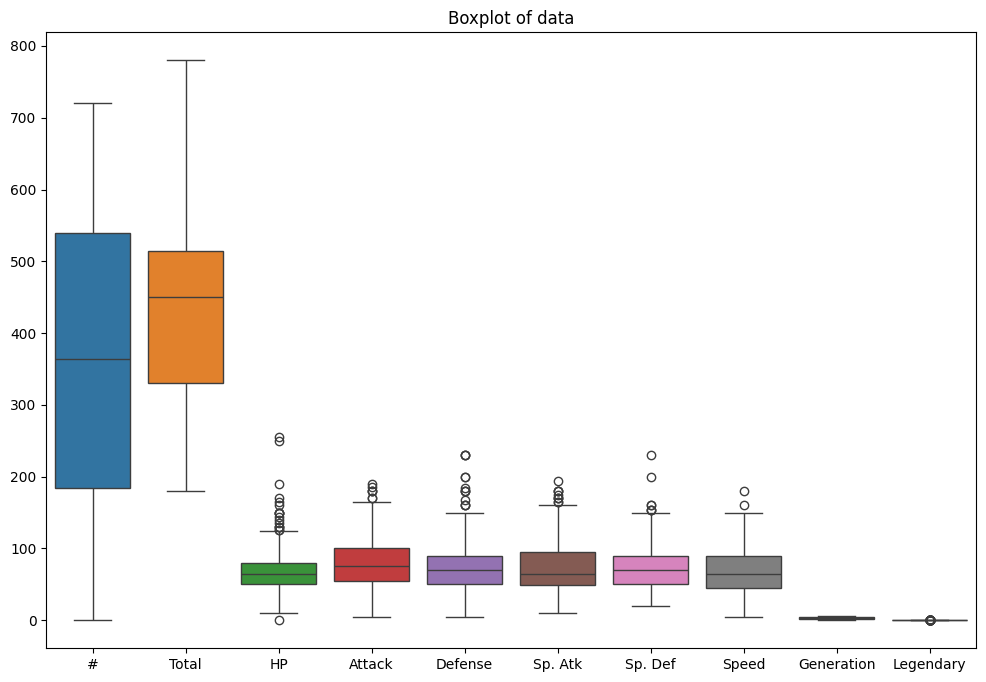

In [ ]:
#5.4
plt.figure(figsize=(12,8))
sn.boxplot(data=df5)
plt.title("Boxplot of data")
plt.show()

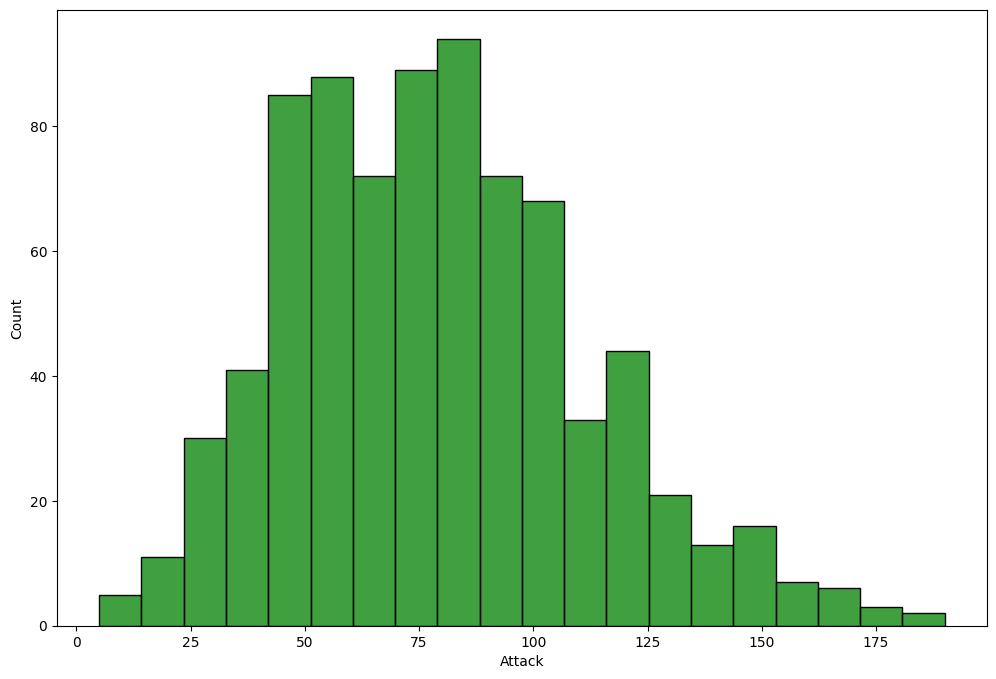

In [ ]:
#5.6
plt.figure(figsize=(12,8))
sn.histplot(df5['Attack'],color="green")
plt.show()

In [ ]:
#5.7
type = df5['Type 1'].value_counts().sort_values()
type

Type 1
Flying        4
Fairy        17
Ice          24
Fighting     27
Steel        27
Poison       28
Dark         31
Ghost        32
Dragon       32
Ground       32
Electric     44
Rock         44
Fire         52
Psychic      57
Bug          69
Grass        70
Normal       98
Water       112
Name: count, dtype: int64

C:\Users\tontide1\AppData\Local\Temp\ipykernel_8572\4156165197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=type.index,y=type.values,palette='muted')


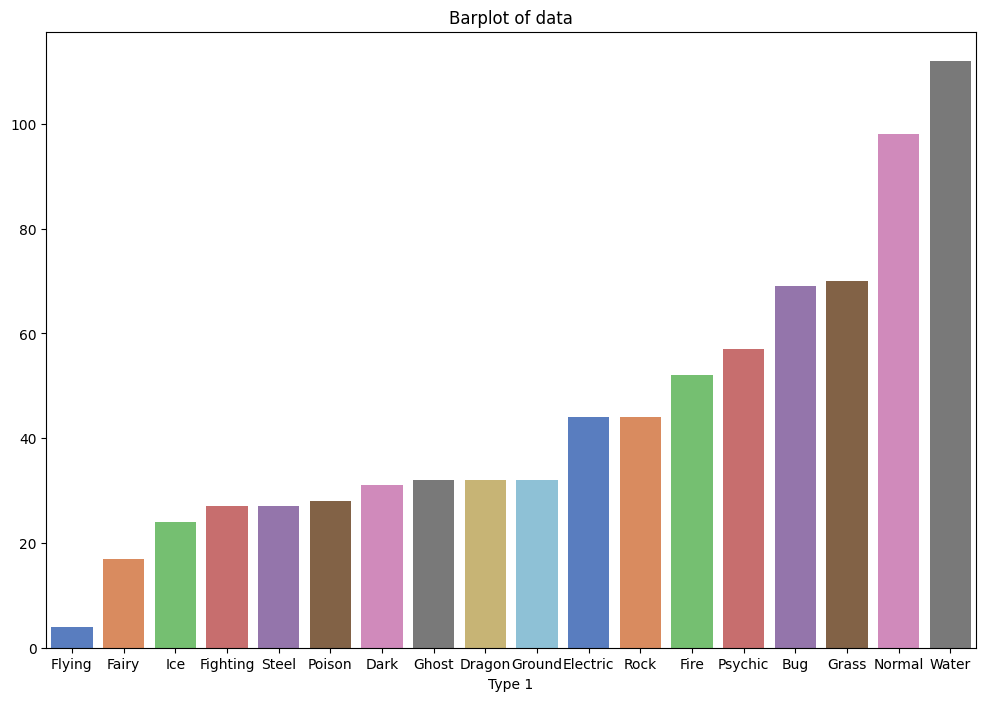

In [ ]:
plt.figure(figsize=(12,8))
sn.barplot(x=type.index,y=type.values,palette='muted')
plt.title("Barplot of data")
plt.show()

<Figure size 1200x800 with 0 Axes>

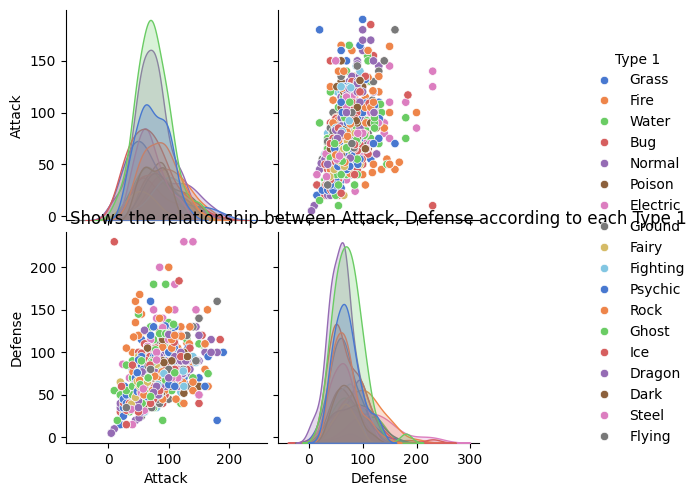

In [ ]:
#5.8
plt.figure(figsize=(12,8))
sn.pairplot(data = df5,vars = ['Attack','Defense'],hue = 'Type 1',palette='muted')
plt.title('Shows the relationship between Attack, Defense according to each Type 1')
plt.show()

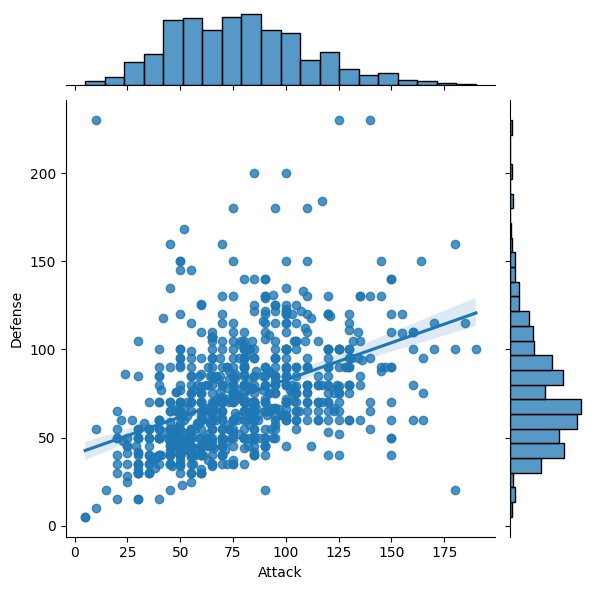

In [ ]:
#5.9
g = sn.JointGrid(x='Attack',y='Defense',data = df5,palette='muted')
g= g.plot(sn.regplot,sn.histplot)
plt.show()

<Figure size 1200x800 with 0 Axes>

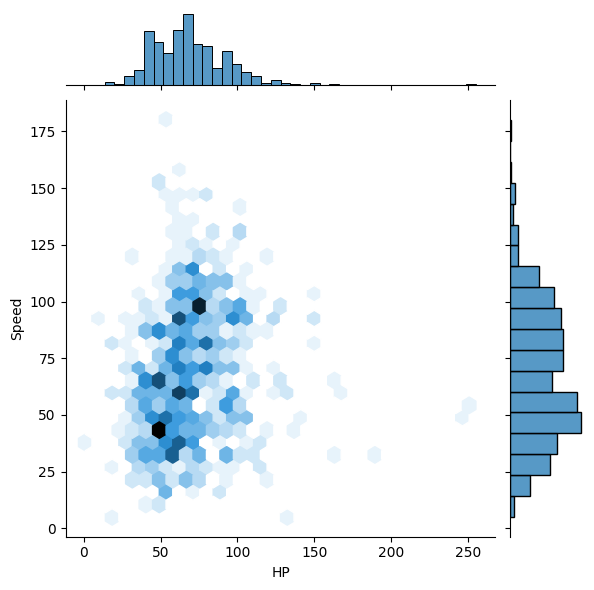

In [ ]:
#5.10
plt.figure(figsize=(12,8))
sn.jointplot(x='HP',y='Speed',data=df5,kind='hex',palette='muted')
plt.show()

### Bài 6

Cho dữ liệu `tips` có sẵn trong seaborn library. Hãy vẽ những biểu đồ sau:

6.1. Vẽ violinplot cho cho cột total_bill

6.2. Vẽ swarmplot cho cột total_bill theo sex

6.3. Vẽ boxplot cho cột total_bill

6.4. Tạo FacetGrid với 'time' và chỉ định thứ tự của các hàng bằng row_order, ánh xạ (map) của 'total_bill' lên lưới

6.5. Tạo Factor plot (phiên bản mới là catplot) chứa point plot của giá trị 'total_bill'

6.6. Tạo PairGrid với một scatter plot "total_bill" và "tip"

6.7. Tạo Pairplot với một scatter plot "total_bill" và "tip", sử dụng palette color = 'day'

In [ ]:
data = sn.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


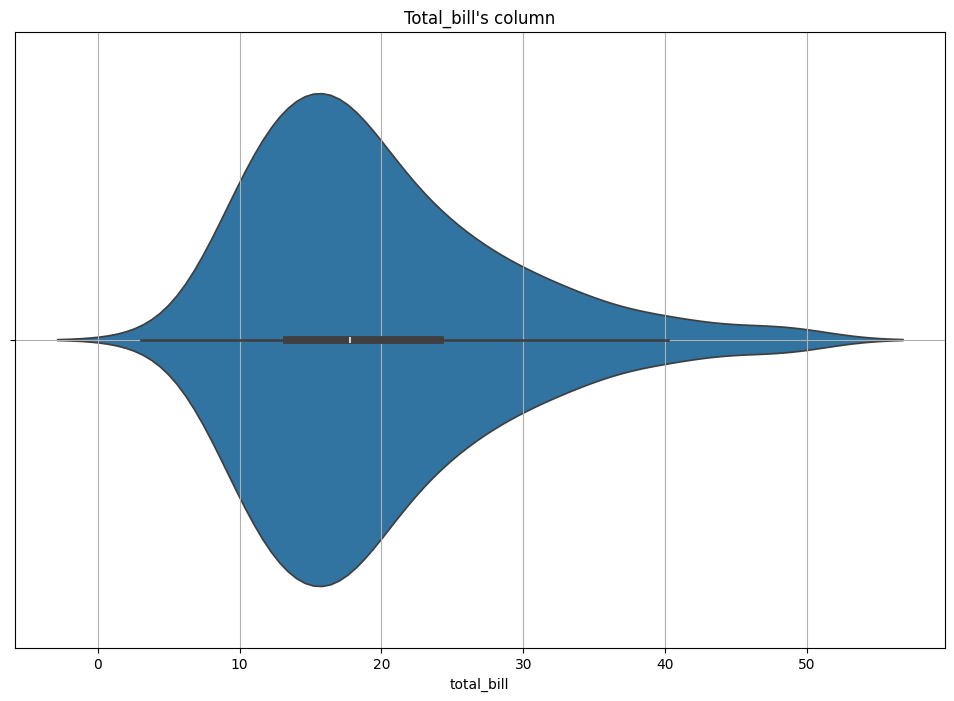

In [ ]:

#6.1
plt.figure(figsize=(12,8))
sn.violinplot(x = data['total_bill'])
plt.grid(True)
plt.title("Total_bill's column")
plt.show()

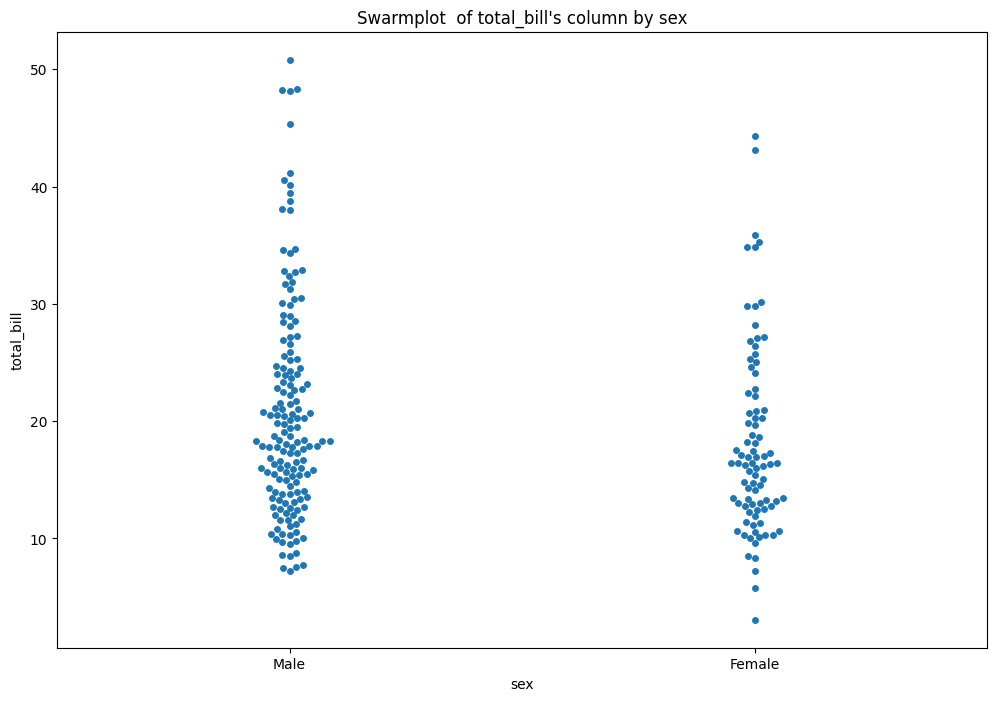

In [ ]:
#6.2
plt.figure(figsize= (12,8))
sn.swarmplot(x = 'sex',y = 'total_bill',data = data)
plt.title("Swarmplot  of total_bill's column by sex")
plt.show()

C:\Users\tontide1\AppData\Local\Temp\ipykernel_8572\531793078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'total_bill',data = data, palette = 'muted')


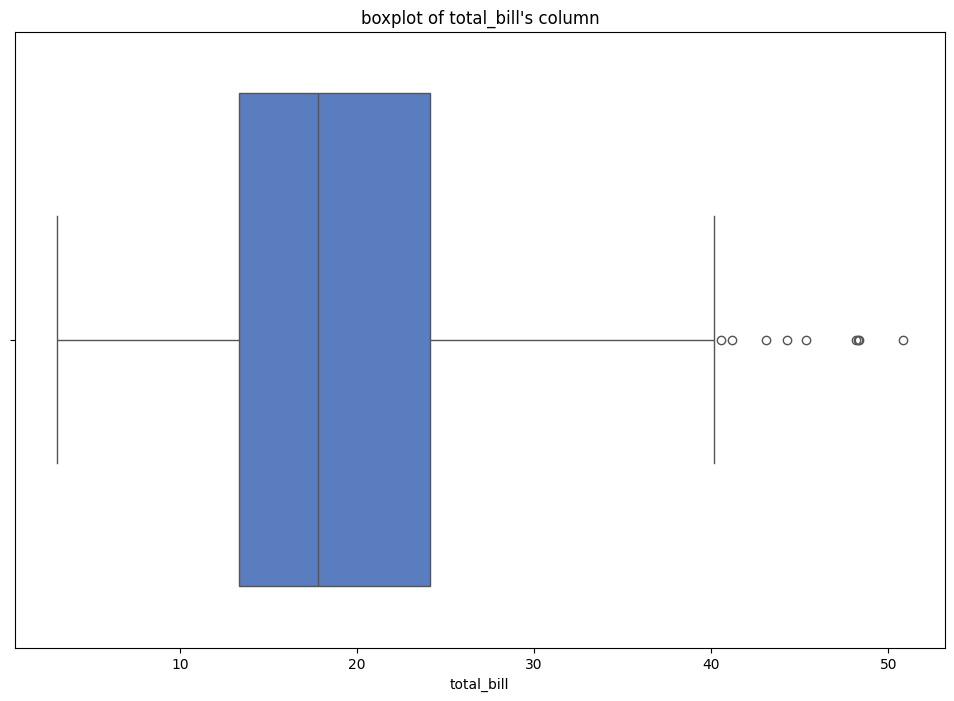

In [ ]:
#6.3
plt.figure(figsize = (12,8))
sn.boxplot(x = 'total_bill',data = data, palette = 'muted')
plt.title("boxplot of total_bill's column")
plt.show()


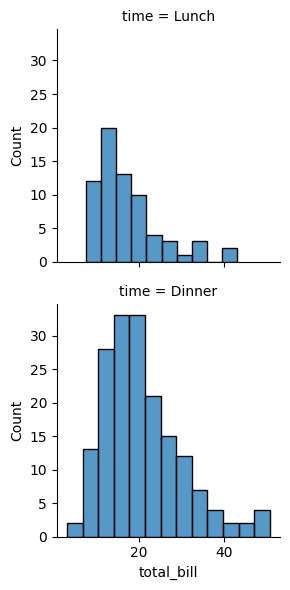

In [ ]:
#6.4
g = sn.FacetGrid(row = 'time', row_order=['Lunch','Dinner'],data = data)
g.map(sn.histplot,'total_bill')
plt.show()

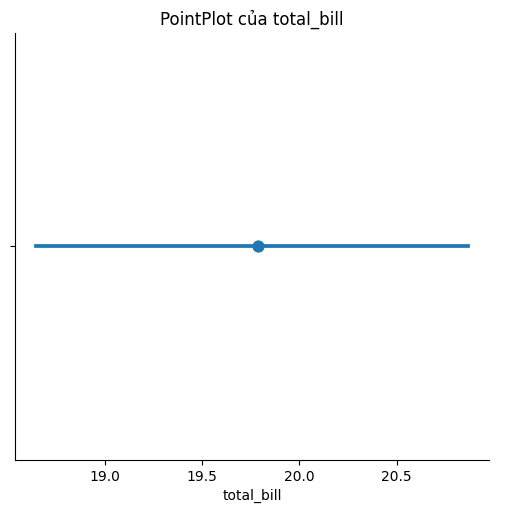

In [ ]:
#6.5
sn.catplot(data = data, x = 'total_bill',kind = "point")
plt.title('PointPlot của total_bill')
plt.show()

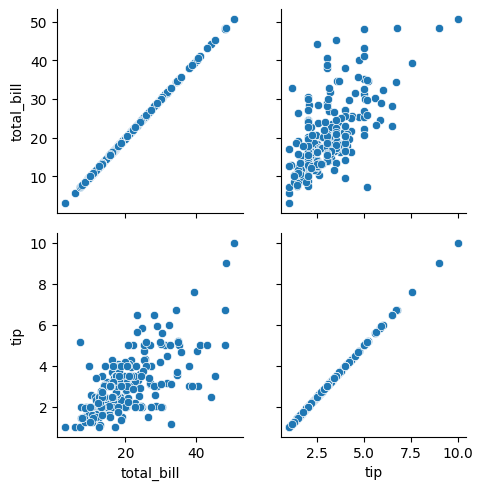

In [ ]:
g = sn.PairGrid(data = data, vars = ['total_bill', 'tip'])
g = g.map(sn.scatterplot)
plt.show()

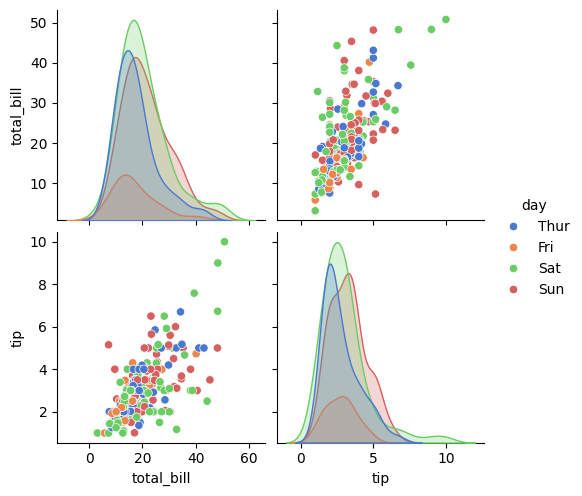

In [ ]:
#6.7
sn.pairplot(data = data, vars=['total_bill', 'tip'],hue = 'day' ,palette = 'muted' )
plt.show()

### Bài 7

Cho dữ liệu `titanic` có sẵn trong seaborn library. Hãy vẽ những biểu đồ sau:

7.1. Vẽ stripplot thể hiện sự phân bố của fare theo class

7.2. Vẽ violinplot thể hiện sự phân bố của fare theo class  

7.3. Vẽ countplot đếm số lượng alive/not alive theo từng class

7.4. Vẽ pointplot thể hiện khả năng sống sót 'survived' theo class

7.5. Vẽ factorplot (phiên bản mới là catplot) dạng bar thể hiện survived của từng sex, phân loại theo class

7.6. Vẽ correlation matrix (heatmap) của titanic

---

In [13]:
import seaborn as sn
data7 = sn.load_dataset('titanic')
data7.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


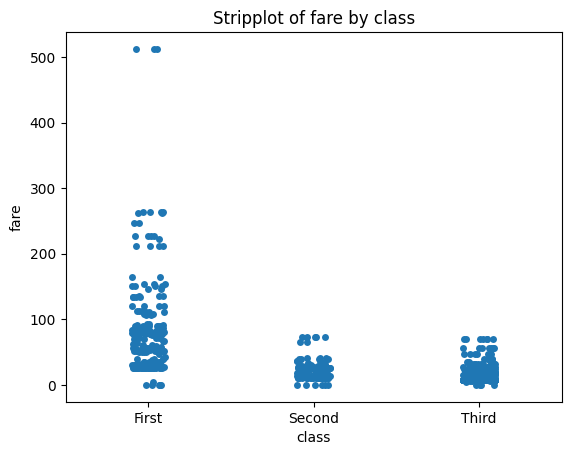

In [ ]:
#7.1
sn.stripplot(data = data7, x ='class', y= 'fare')
plt.title('Stripplot of fare by class')
plt.show()

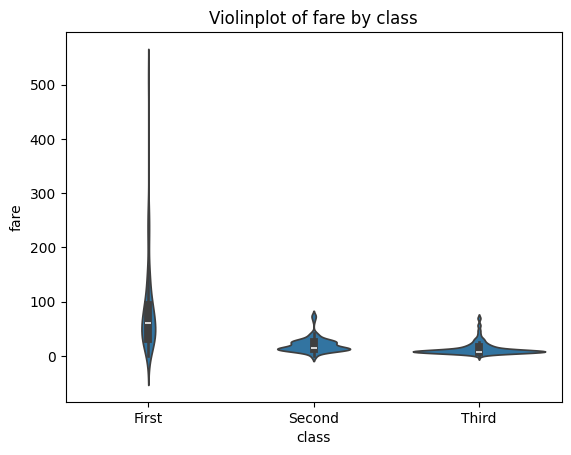

In [ ]:
#7.2
sn.violinplot(data = data7,x = 'class', y ='fare')
plt.title('Violinplot of fare by class')
plt.show()

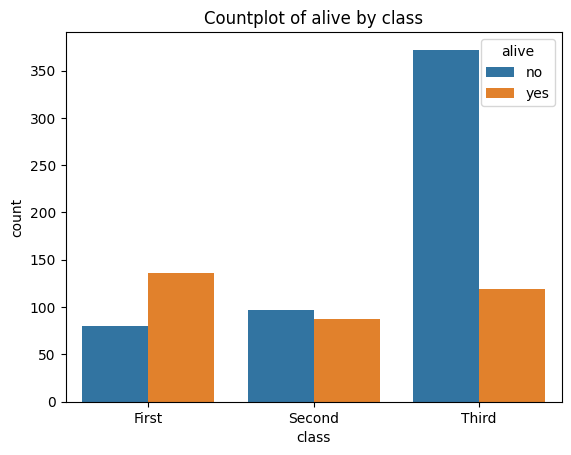

In [ ]:
#7.3
sn.countplot(data = data7, x  = 'class',hue = 'alive')
plt.title("Countplot of alive by class")
plt.show()

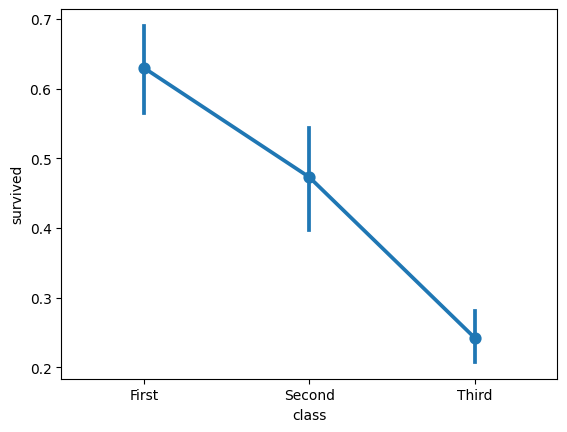

In [ ]:
#7.4
sn.pointplot(data = data7 , x = 'class',y = 'survived')
plt.show()

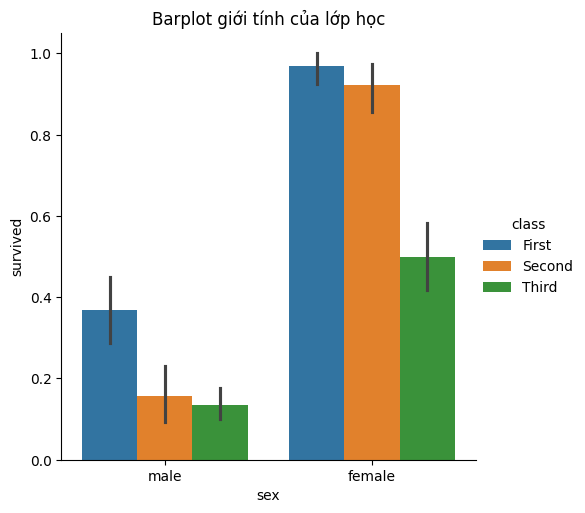

In [ ]:
#7.5
sn.catplot(data = data7 , x = 'sex', y = 'survived',hue = 'class',kind ='bar')
plt.title('Barplot giới tính của lớp học')
plt.show()

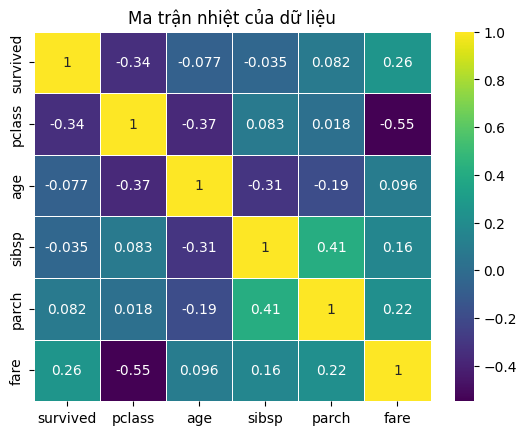

In [ ]:
#7.6
numeric_data7 = data7.select_dtypes(include=['float64', 'int64'])
corr = numeric_data7.corr()
sn.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Ma trận nhiệt của dữ liệu')
plt.show()